# 1. Understanding the Problem and Compiling the Problem Statement

## Business Context

Operational and product teams need insights to estimate Delivery_Time_min more accurately, identify key delivery time drivers to improve courier scheduling and vehicle mode selection, and develop service fee/promotion policies based on external conditions (weather, traffic, time of day)

## Problem Statement

1. What are the main factors influencing Delivery_Time_min?

2. How much do Distance_km, Weather, Traffic_Level, Time_of_Day, Vehicle_Type, and Courier_Experience_yrs contribute to variation in delivery times?

3. What patterns or trends emerge across conditions (weather, traffic, time of day) that can be translated into operational decisions?

4. Are there any significant interactions (e.g., weather effects differ by vehicle type or time of day) that need to be considered?

In [3]:
import pandas as pd
import numpy as np
import os

df = pd.read_csv('/content/Food_Delivery_Times.csv')

In [4]:
# See the number of rows and columns
df.shape

(1000, 9)

In [6]:
# First 5 lines
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [9]:
# Data type info
df.dtypes

,0
Order_ID,int64
Distance_km,float64
Weather,object
Traffic_Level,object
Time_of_Day,object
Vehicle_Type,object
Preparation_Time_min,int64
Courier_Experience_yrs,float64
Delivery_Time_min,int64


In [22]:
# Identifying Missing Values
missing_values = df.isna().sum()
print("Number of missing values ​​per column:")
print(missing_values)

Number of missing values ​​per column:
Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


In [23]:
for col, val in missing_values.items():
    if val == 0:
        print(f"- {col}: No missing value, safe.")
    elif val <= len(df)*0.05:
        print(f"- {col}: There are missing values {val} missing (<5%), can be imputed or dropped without major impact.")
    else:
        print(f"- {col}: There are missing values {val} missing (>=5%), require special strategies (imputation, column drop, or investigation).")

- Order_ID: No missing value, safe.
- Distance_km: No missing value, safe.
- Weather: There are missing values 30 missing (<5%), can be imputed or dropped without major impact.
- Traffic_Level: There are missing values 30 missing (<5%), can be imputed or dropped without major impact.
- Time_of_Day: There are missing values 30 missing (<5%), can be imputed or dropped without major impact.
- Vehicle_Type: No missing value, safe.
- Preparation_Time_min: No missing value, safe.
- Courier_Experience_yrs: There are missing values 30 missing (<5%), can be imputed or dropped without major impact.
- Delivery_Time_min: No missing value, safe.


In [24]:
# Presentation missing value
missing_percent = df.isna().mean() * 100
print("\nPersentation missing values per column (%):")
print(missing_percent.round(2))


Persentation missing values per column (%):
Order_ID                  0.0
Distance_km               0.0
Weather                   3.0
Traffic_Level             3.0
Time_of_Day               3.0
Vehicle_Type              0.0
Preparation_Time_min      0.0
Courier_Experience_yrs    3.0
Delivery_Time_min         0.0
dtype: float64


In [25]:
print("\n[Interpretation of Missing Percentage]")
for col, val in missing_percent.items():
    if val == 0:
        print(f"- {col}: 0% missing, ideal.")
    elif val < 5:
        print(f"- {col}: {val:.2f}% missing, it can still be handled simply.")
    else:
        print(f"- {col}: {val:.2f}% missing, significant -> requires special attention.")


[Interpretation of Missing Percentage]
- Order_ID: 0% missing, ideal.
- Distance_km: 0% missing, ideal.
- Weather: 3.00% missing, it can still be handled simply.
- Traffic_Level: 3.00% missing, it can still be handled simply.
- Time_of_Day: 3.00% missing, it can still be handled simply.
- Vehicle_Type: 0% missing, ideal.
- Preparation_Time_min: 0% missing, ideal.
- Courier_Experience_yrs: 3.00% missing, it can still be handled simply.
- Delivery_Time_min: 0% missing, ideal.


In [14]:
# Number of unique value
df.nunique(dropna=True)

,0
Order_ID,1000
Distance_km,785
Weather,5
Traffic_Level,3
Time_of_Day,4
Vehicle_Type,3
Preparation_Time_min,25
Courier_Experience_yrs,10
Delivery_Time_min,108


In [26]:
# Duplication by Order_ID
nunique_values = df.nunique(dropna=True)
print("\nNumber of unique values ​​per column:")
print(nunique_values)


Number of unique values ​​per column:
Order_ID                  1000
Distance_km                785
Weather                      5
Traffic_Level                3
Time_of_Day                  4
Vehicle_Type                 3
Preparation_Time_min        25
Courier_Experience_yrs      10
Delivery_Time_min          108
dtype: int64


In [28]:
for col, val in nunique_values.items():
    if val < 20:
        print(f"- {col}: Tends to be categorica (only {val} unique values).")
    else:
        print(f"- {col}: Tends to be numerical/continuous (there are {val} unique values).")

- Order_ID: Tends to be numerical/continuous (there are 1000 unique values).
- Distance_km: Tends to be numerical/continuous (there are 785 unique values).
- Weather: Tends to be categorica (only 5 unique values).
- Traffic_Level: Tends to be categorica (only 3 unique values).
- Time_of_Day: Tends to be categorica (only 4 unique values).
- Vehicle_Type: Tends to be categorica (only 3 unique values).
- Preparation_Time_min: Tends to be numerical/continuous (there are 25 unique values).
- Courier_Experience_yrs: Tends to be categorica (only 10 unique values).
- Delivery_Time_min: Tends to be numerical/continuous (there are 108 unique values).


In [17]:
# Mandatory column validation
required_cols = [
    "Order_ID", "Distance_km", "Weather", "Traffic_Level", "Time_of_Day",
    "Vehicle_Type", "Preparing_Time_min", "Courier_Experience_yrs", "Delivery_Time_min"
]

In [18]:
def schema_summary(dataframe, sample_n_unique=5):
    rows = []
    for col in dataframe.columns:
        ser = dataframe[col]
        rows.append({
            "column": col,
            "dtype": str(ser.dtype),
            "non_null": int(ser.notna().sum()),
            "missing": int(ser.isna().sum()),
            "missing_%": round(ser.isna().mean() * 100, 2),
            "nunique": int(ser.nunique(dropna=True)),
            "sample_values": ", ".join(ser.dropna().astype(str).unique()[:sample_n_unique])
        })
    return pd.DataFrame(rows)

print("\nSchema Summary:")
display(schema_summary(df))

# Duplication by Order_ID
if "Order_ID" in df.columns:
    dup_count = df["Order_ID"].duplicated().sum()
    print(f"Number of duplicates Order_ID: {dup_count}")
else:
    print("The 'Order_ID' column is missing, will address this in next step if necessary.")

# Mandatory column validation
required_cols = [
    "Order_ID", "Distance_km", "Weather", "Traffic_Level", "Time_of_Day",
    "Vehicle_Type", "Preparing_Time_min", "Courier_Experience_yrs", "Delivery_Time_min"
]
missing_required = [c for c in required_cols if c not in df.columns]
print("\nMissing required fields:", missing_required if missing_required else "None, all available.")


Schema Summary:


,column,dtype,non_null,missing,missing_%,nunique,sample_values
0,Order_ID,int64,1000,0,0.0,1000,"522, 738, 741, 661, 412"
1,Distance_km,float64,1000,0,0.0,785,"7.93, 16.42, 9.52, 7.44, 19.03"
2,Weather,object,970,30,3.0,5,"Windy, Clear, Foggy, Rainy, Snowy"
3,Traffic_Level,object,970,30,3.0,3,"Low, Medium, High"
4,Time_of_Day,object,970,30,3.0,4,"Afternoon, Evening, Night, Morning"
5,Vehicle_Type,object,1000,0,0.0,3,"Scooter, Bike, Car"
6,Preparation_Time_min,int64,1000,0,0.0,25,"12, 20, 28, 5, 16"
7,Courier_Experience_yrs,float64,970,30,3.0,10,"1.0, 2.0, 5.0, 9.0, 6.0"
8,Delivery_Time_min,int64,1000,0,0.0,108,"43, 84, 59, 37, 68"


Number of duplicates Order_ID: 0

Missing required fields: ['Preparing_Time_min']


# 2. Data Preprocessing

In [29]:
# Make sure the column names do not contain hidden spaces
df.columns = [c.strip() for c in df.columns]

In [30]:
# Define numeric/categorical columns
numeric_cols = [c for c in ["Distance_km", "Preparing_Time_min", "Courier_Experience_yrs", "Delivery_Time_min"] if c in df.columns]
cat_cols     = [c for c in ["Weather", "Traffic_Level", "Time_of_Day", "Vehicle_Type"] if c in df.columns]

In [31]:
# Numeric conversion that should be numeric
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

In [34]:
# Categorical label normalization
# (lowercase, strip spaces, mapping to default labels)
def clean_str_series(s: pd.Series):
    return s.astype(str).str.strip().str.lower()

# Standard label dictionary
weather_map = {
    "sunny": "Sunny",
    "rainy": "Rainy",
    "snowy": "Snowy",
    "foggy": "Foggy",
    "windy": "Windy"
}
traffic_map = {
    "low": "Low",
    "medium": "Medium",
    "high": "High"
}
tod_map = {
    "morning": "Morning",
    "afternoon": "Afternoon",
    "evening": "Evening",
    "night": "Night"
}
vehicle_map = {
    "bike": "Bike",
    "scooter": "Scooter",
    "car": "Car"
}


# Apply if column exists
if "Weather" in df.columns:
    df["Weather"] = clean_str_series(df["Weather"]).map(weather_map).fillna(df["Weather"])
if "Traffic_Level" in df.columns:
    df["Traffic_Level"] = clean_str_series(df["Traffic_Level"]).map(traffic_map).fillna(df["Traffic_Level"])
if "Time_of_Day" in df.columns:
    df["Time_of_Day"] = clean_str_series(df["Time_of_Day"]).map(tod_map).fillna(df["Time_of_Day"])
if "Vehicle_Type" in df.columns:
    df["Vehicle_Type"] = clean_str_series(df["Vehicle_Type"]).map(vehicle_map).fillna(df["Vehicle_Type"])


# Category normalization
print("\n[Category normalization]")
for c in cat_cols:
    if c in df.columns:
        uniq = df[c].dropna().unique()
        print(f"- {c}: {sorted(uniq)}")


[Category normalization]
- Weather: ['Clear', 'Foggy', 'Rainy', 'Snowy', 'Windy']
- Traffic_Level: ['High', 'Low', 'Medium']
- Time_of_Day: ['Afternoon', 'Evening', 'Morning', 'Night']
- Vehicle_Type: ['Bike', 'Car', 'Scooter']


In [36]:
# Drop missing targets if any
reports = []

if "Delivery_Time_min" in df.columns:
    before = len(df)
    df = df[~df["Delivery_Time_min"].isna()].copy()
    dropped = before - len(df)
    msg = f"Drop {dropped} row due to missing  Delivery_Time_min target." if dropped > 0 else "There are no rows with missing targets."
    reports.append(msg)
else:
    reports.append("TARGET 'Delivery_Time_min' none, target analysis cannot be performed.")


# Numerical imputation (other than target)
for c in [col for col in numeric_cols if col != "Delivery_Time_min" and col in df.columns]:
    miss_cnt = df[c].isna().sum()
    if miss_cnt > 0:
        df[f"{c}__was_missing"] = df[c].isna().astype(int)
        med = df[c].median()
        df[c] = df[c].fillna(med)
        reports.append(f"Median imputation for {c} (missing {miss_cnt}).")
    else:
        reports.append(f"There is no missing in {c}.")

# Categorical imputation
for c in cat_cols:
    if c in df.columns:
        miss_cnt = df[c].isna().sum()
        if miss_cnt > 0:
            df[f"{c}__was_missing"] = df[c].isna().astype(int)
            mode_val = df[c].mode(dropna=True)
            mode_val = mode_val.iloc[0] if len(mode_val) else "Unknown"
            df[c] = df[c].fillna(mode_val)
            reports.append(f"Mode imputation for {c} (missing {miss_cnt}) with '{mode_val}'.")
        else:
            reports.append(f"There is no missing in {c}.")

print("\n[Handling Missing Values]")
for r in reports:
    print("-", r)


[Handling Missing Values]
- There are no rows with missing targets.
- There is no missing in Distance_km.
- Median imputation for Courier_Experience_yrs (missing 30).
- Mode imputation for Weather (missing 30) with 'Clear'.
- Mode imputation for Traffic_Level (missing 30) with 'Medium'.
- Mode imputation for Time_of_Day (missing 30) with 'Morning'.
- There is no missing in Vehicle_Type.


In [37]:
# Handling duplication
dup_report = ""
if "Order_ID" in df.columns:
    dup_cnt = df["Order_ID"].duplicated().sum()
    if dup_cnt > 0:
        df = df.drop_duplicates(subset=["Order_ID"], keep="first")
        dup_report = f"Remove {dup_cnt} duplicate based on Order_ID (keep=first)."
    else:
        dup_report = "No duplicates based on Order_ID."
else:
    # If there is no Order_ID, perform deduplication of identical rows
    dup_cnt = df.duplicated().sum()
    if dup_cnt > 0:
        df = df.drop_duplicates(keep="first")
        dup_report = f"Deleting {dup_cnt} duplicate identical rows (Order_ID not available)."
    else:
        dup_report = "No duplicate identical rows."
print("\n[Duplication] " + dup_report)


[Duplication] No duplicates based on Order_ID.


In [39]:
# Outlier
def winsorize_iqr(series: pd.Series, k=1.5):
    q1, q3 = series.quantile(0.25), series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    capped = series.clip(lower, upper)
    return capped, lower, upper

outlier_cols = [c for c in ["Distance_km", "Preparing_Time_min", "Courier_Experience_yrs", "Delivery_Time_min"] if c in df.columns]

print("\n[Outliers - IQR Winsorizing]")
for c in outlier_cols:
    df[f"{c}_raw"] = df[c]
    capped, low_b, up_b = winsorize_iqr(df[c])
    changed = (capped != df[c]).sum()
    df[c] = capped
    print(f"- {c}: limits [{low_b:.3f}, {up_b:.3f}], capped value: {changed}")


[Outliers - IQR Winsorizing]
- Distance_km: limits [-9.764, 29.886], capped value: 0
- Courier_Experience_yrs: limits [-5.500, 14.500], capped value: 0
- Delivery_Time_min: limits [-4.000, 116.000], capped value: 0


In [40]:
# Save preprocessing results for EDA
df_clean = df.copy()
print("df_clean size:", df_clean.shape)

df_clean size: (1000, 16)


# 3. Exploratory Data Analysis

- Viewing the distribution of numeric and categorical variables

- Target analysis (Delivery_Time_min)

- Relationship between variables and targets

- Visualization: histogram, boxplot, scatterplot, heatmap

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df_clean.copy()

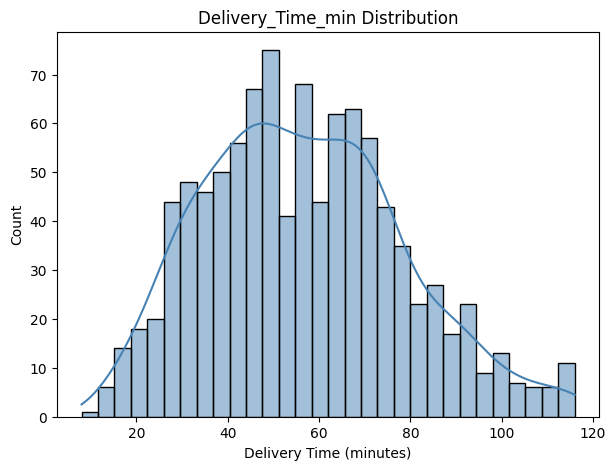


[Target Distribution: Delivery_Time_min]
count    1000.000000
mean       56.622000
std        21.708394
min         8.000000
25%        41.000000
50%        55.500000
75%        71.000000
max       116.000000
Name: Delivery_Time_min, dtype: float64
- Mean is higher than median -> indicates a right skew distribution (there are long duration outliers).
- Note the max range -> compare with Q3 (75% quartile).


In [43]:
# Target distribution
plt.figure(figsize=(7,5))
sns.histplot(df["Delivery_Time_min"], bins=30, kde=True, color="steelblue")
plt.title("Delivery_Time_min Distribution")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Count")
plt.show()

print("\n[Target Distribution: Delivery_Time_min]")
print(df["Delivery_Time_min"].describe())
print("- Mean is higher than median -> indicates a right skew distribution (there are long duration outliers).")
print("- Note the max range -> compare with Q3 (75% quartile).")

- The most frequent delivery time (mode) is around 50–55 minutes -> can be used as a baseline ETA (Estimated Time of Arrival).

- Deliveries taking longer than 90 minutes need to be investigated. Is this due to long distance, traffic, or bad weather?

- This distribution is fairly "stable" in the middle, so for most orders, the SLA (Service Level Agreement) can be targeted at ~60 minutes.

- However, a buffer should be prepared for extreme conditions (approximately 10% of orders can take longer than 90 minutes).

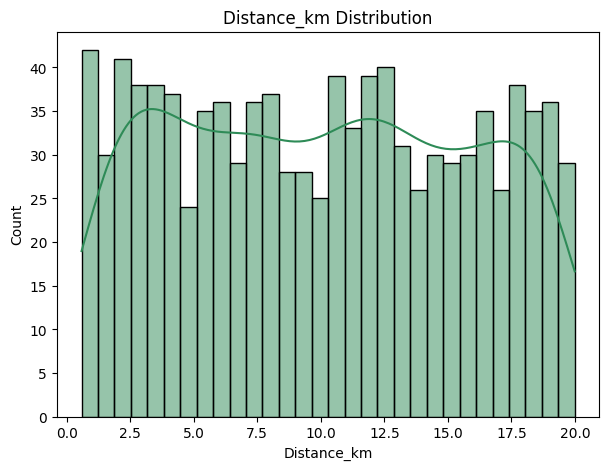


[Distance_km Distribution]
count    1000.000000
mean       10.059970
std         5.696656
min         0.590000
25%         5.105000
50%        10.190000
75%        15.017500
max        19.990000
Name: Distance_km, dtype: float64


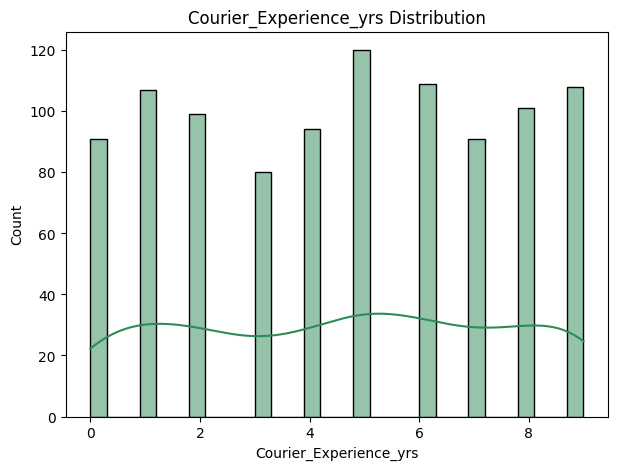


[Courier_Experience_yrs Distribution]
count    1000.000000
mean        4.592000
std         2.871198
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Courier_Experience_yrs, dtype: float64


In [45]:
# Distribution of numeric variables
for col in ["Distance_km", "Courier_Experience_yrs"]:
    if col in df.columns:
        plt.figure(figsize=(7,5))
        sns.histplot(df[col], bins=30, kde=True, color="seagreen")
        plt.title(f"{col} Distribution")
        plt.show()
        print(f"\n[{col} Distribution]")
        print(df[col].describe())

1. Distance_km

- Almost evenly distributed from 0 to 20 km.

- There is no dominant peak -> the distance data is fairly evenly distributed, meaning the company serves both short distance and long distance deliveries in similar proportions.

2. Courier_Experience_yrs

- It appears relatively balanced, ranging from 0 to 9 years.

- There's no concentration on new or experienced couriers -> the company has a mix of rookie and senior couriers.


/tmp/ipython-input-681787949.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[c], y=df["Delivery_Time_min"], palette="Set3")


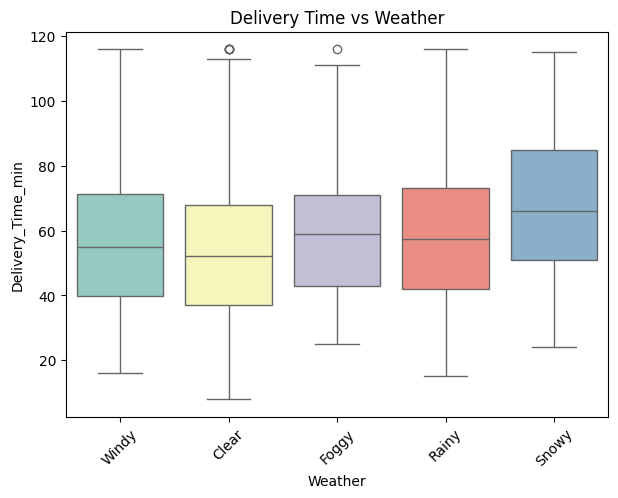


[Initial insights: Weather]
Weather
Clear    53.012000
Windy    55.395833
Foggy    59.466019
Rainy    59.622549
Snowy    67.113402
Name: Delivery_Time_min, dtype: float64


/tmp/ipython-input-681787949.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[c], y=df["Delivery_Time_min"], palette="Set3")


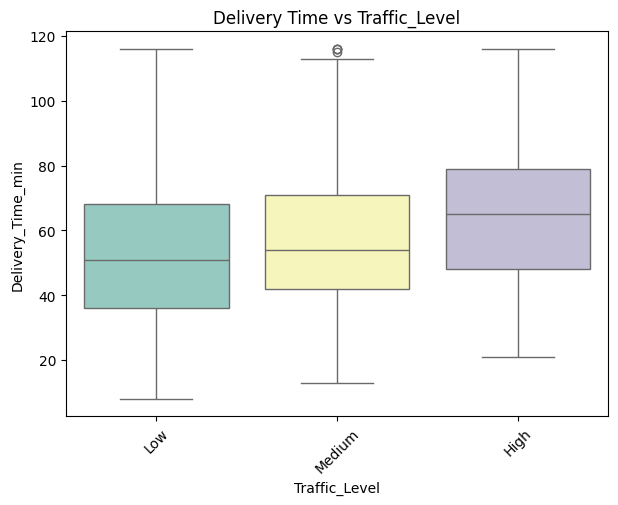


[Initial insights: Traffic_Level]
Traffic_Level
Low       52.728460
Medium    56.347619
High      64.776650
Name: Delivery_Time_min, dtype: float64


/tmp/ipython-input-681787949.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[c], y=df["Delivery_Time_min"], palette="Set3")


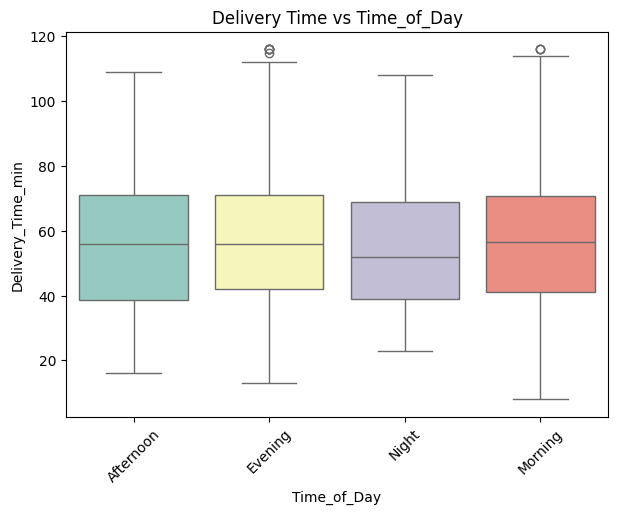


[Initial insights: Time_of_Day]
Time_of_Day
Night        55.211765
Afternoon    56.080986
Morning      56.798817
Evening      57.351536
Name: Delivery_Time_min, dtype: float64


/tmp/ipython-input-681787949.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[c], y=df["Delivery_Time_min"], palette="Set3")


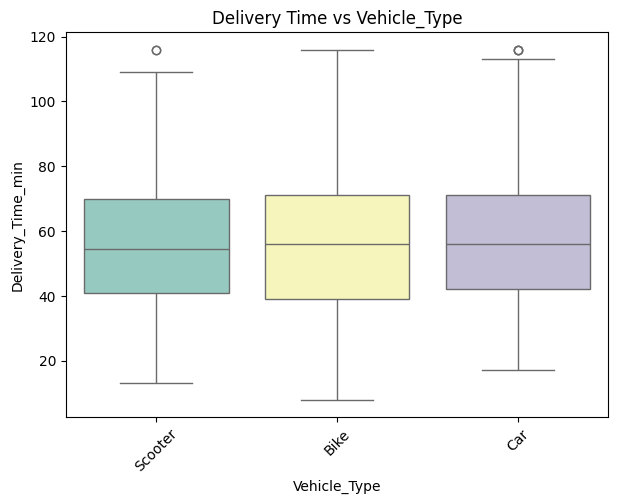


[Initial insights: Vehicle_Type]
Vehicle_Type
Scooter    55.900662
Bike       56.512922
Car        58.020513
Name: Delivery_Time_min, dtype: float64


In [46]:
# Category vs target (BOXPLOT)
cat_cols = [c for c in ["Weather", "Traffic_Level", "Time_of_Day", "Vehicle_Type"] if c in df.columns]

for c in cat_cols:
    plt.figure(figsize=(7,5))
    sns.boxplot(x=df[c], y=df["Delivery_Time_min"], palette="Set3")
    plt.title(f"Delivery Time vs {c}")
    plt.xticks(rotation=45)
    plt.show()

    print(f"\n[Initial insights: {c}]")
    group_mean = df.groupby(c)["Delivery_Time_min"].mean().sort_values()
    print(group_mean)

1. Delivery Time vs Weather

- Clear -> lowest median time (around 50 minutes).

- Rainy, Foggy, Windy → higher median (55–60 minutes).

- Snowy -> longest (median approaching 65 minutes).

- Outliers = All weather conditions can result in times >100 minutes, but are more frequent during inclement weather.

Weather clearly impacts performance. When it's snowing, raining, or foggy, additional time buffers are required. SLA (Service Level Agreement) can be stricter during clear weather.

2. Delivery Time vs Traffic_Level

- Low traffic -> median time ±50 minutes.

- Medium -> slight increase (±55 minutes).

- High -> longest (median ±65 minutes).

- Outliers increase at the High level.

Traffic is one of the biggest drivers of delivery time. Each level increase -> an additional ±10 minutes.
Recommendation: The ETA (Estimated Time of Arrival) system should be dynamic and traffic-based.

3. Delivery Time vs Time_of_Day

- Night -> relatively lower median (±50 minutes).

- Afternoon & Evening -> higher median (55–60 minutes).

- Morning -> tends to be longer, even similar to Evening.

- Outliers (up to >100 minutes) occur during Morning & Evening (peak hours).

Delivery is fastest at night, likely due to smoother traffic.
Delivery is slowest during morning & evening (rush hour).
Recommendation-> Allocate more couriers during peak hours (morning & evening).

4. Delivery Time vs Vehicle_Type

- Bike -> higher median than Scooter & Car. Bicycles are slower, effective only for short distances.

- Scooter & Car -> similar median (±55 minutes). Scooters are efficient for medium distances.

- However, Car tends to have longer outlier times (possibly due to the effects of short-distance traffic jams). Cars are suitable for long distances, but in dense cities -> potential delays.

Strategy: Allocate modes according to distance and traffic.

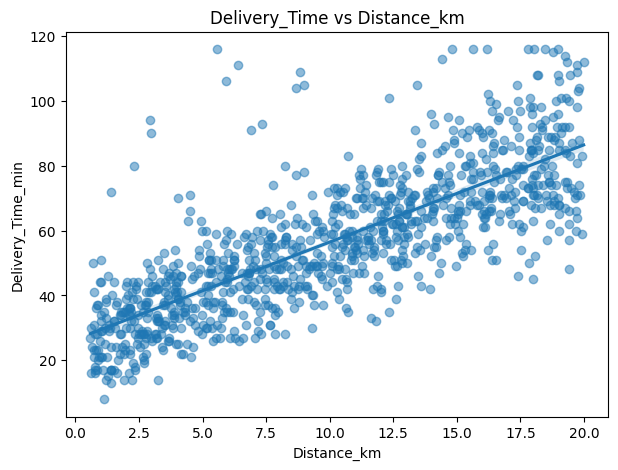


[Correlation Distance_km vs Delivery_Time_min]: 0.787


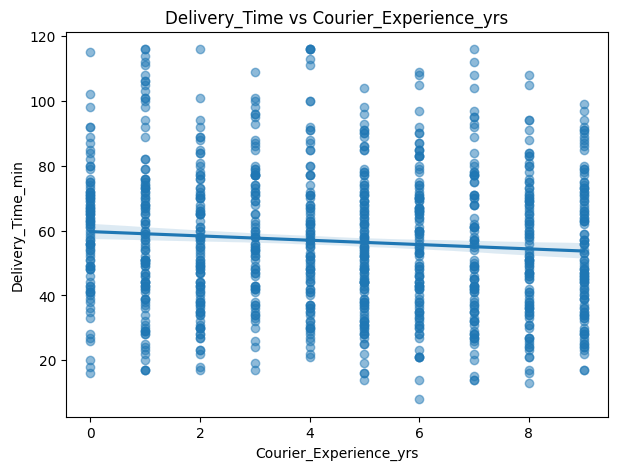


[Correlation Courier_Experience_yrs vs Delivery_Time_min]: -0.088


In [47]:
# Numeric vs target (SCATTER + REGPLOT)
for col in ["Distance_km", "Courier_Experience_yrs"]:
    if col in df.columns:
        plt.figure(figsize=(7,5))
        sns.regplot(x=df[col], y=df["Delivery_Time_min"], scatter_kws={'alpha':0.5})
        plt.title(f"Delivery_Time vs {col}")
        plt.show()

        corr = df[[col,"Delivery_Time_min"]].corr().iloc[0,1]
        print(f"\n[Correlation {col} vs Delivery_Time_min]: {corr:.3f}")

1. Delivery_Time vs Distance_km

-The pattern is clearly positive linear-

- The longer the distance (Distance_km), the longer the delivery time (Delivery_Time_min).

- The dots form a "cloud" with an upward trend line -> a strong positive correlation.

- Short distance (0–5 km): delivery typically takes 20–50 minutes.

- Medium distance (5–15 km): times are widely distributed, from 30 minutes to >90 minutes.

- Long distance (>15 km): most deliveries take >70 minutes, some even >100 minutes.


Distance_km is the primary time factor.

2. Delivery_Time vs Courier_Experience_yrs

-The pattern is very weak-

- The trend line is slightly downward → a weak negative correlation. This means that more experienced couriers tend to be slightly faster, but not significantly so.

- Delivery time variation remains very high across all experience levels. Some couriers with 0 years of experience can be fast, while others with more than 5 years of experience are still slow → external factors (distance, traffic, weather) are more dominant.

Operations should focus on route management, traffic, and external conditions, not just courier experience.

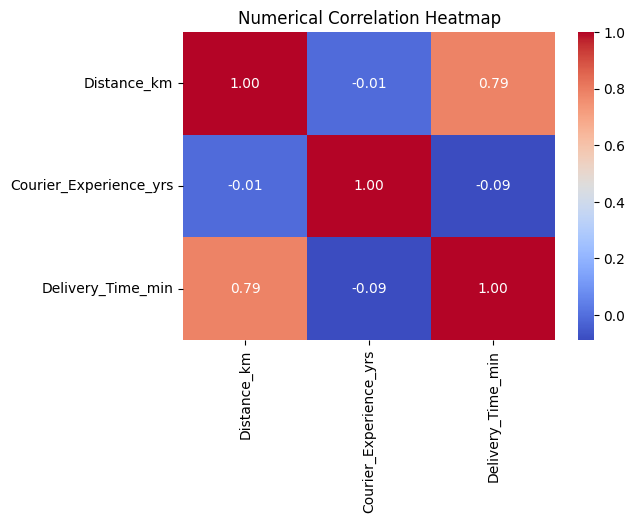

In [49]:
# Numerical correlation heatmap
num_cols = [c for c in ["Distance_km", "Courier_Experience_yrs", "Delivery_Time_min"] if c in df.columns]
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Numerical Correlation Heatmap")
plt.show()

1. Distance_km <-> Delivery_Time_min

The correlation value is +0.79 (strong, positive). This means that the further the distance, the longer the delivery time -> this is the most influential numerical factor.

2. Courier_Experience_yrs <-> Delivery_Time_min

The correlation value is -0.09 (weak, negative). Courier experience has very little influence on delivery time.

3. Distance_km <-> Courier_Experience_yrs

The correlation is almost 0 (-0.01) -> meaning that the distance distribution does not depend on the courier's experience.


Insight:

1. Distance_km is the primary driver -> this aligns with the previous scatterplot.

2. Courier Experience is not significant -> experienced couriers are not always faster, as external factors are more dominant.

3. Other numeric variables (such as Preparing_Time_min, if present) could add dimension to the analysis, but in this dataset, distance is the most important.

Recommendation:

1. Use Distance_km as the core variable in calculating ETA (Estimated Time of Arrival).

2. Courier experience should not be the primary basis for assignments; it's better to focus on distance, traffic, and weather factors.


In [51]:
# Insight summary
print("\n=== INSIGHT SUMMARY (EDA) ===")

# Numerical factors
if "Distance_km" in df.columns:
    corr = df[["Distance_km","Delivery_Time_min"]].corr().iloc[0,1]
    print(f"- Distance_km: correlation {corr:.2f} → the further the distance, the longer the delivery time (rational).")

if "Courier_Experience_yrs" in df.columns:
    corr = df[["Courier_Experience_yrs","Delivery_Time_min"]].corr().iloc[0,1]
    if corr < 0:
        print(f"- Courier_Experience_yrs: correlation {corr:.2f} → The more experienced the courier, the faster they tend to be.")
    else:
        print(f"- Courier_Experience_yrs: correlation {corr:.2f} → experience does not have a significant influence.")

# Categorical factors
for c in cat_cols:
    means = df.groupby(c)["Delivery_Time_min"].mean()
    worst = means.idxmax(); best = means.idxmin()
    print(f"- {c}: fastest average '{best}' ({means[best]:.1f} mnt), late '{worst}' ({means[worst]:.1f} mnt).")

print("\n[Next Step] → This insight can be the basis for operational recommendations (e.g. which vehicle mode is faster, which weather conditions require buffering).")


=== INSIGHT SUMMARY (EDA) ===
- Distance_km: correlation 0.79 → the further the distance, the longer the delivery time (rational).
- Courier_Experience_yrs: correlation -0.09 → The more experienced the courier, the faster they tend to be.
- Weather: fastest average 'Clear' (53.0 mnt), late 'Snowy' (67.1 mnt).
- Traffic_Level: fastest average 'Low' (52.7 mnt), late 'High' (64.8 mnt).
- Time_of_Day: fastest average 'Night' (55.2 mnt), late 'Evening' (57.4 mnt).
- Vehicle_Type: fastest average 'Scooter' (55.9 mnt), late 'Car' (58.0 mnt).

[Next Step] → This insight can be the basis for operational recommendations (e.g. which vehicle mode is faster, which weather conditions require buffering).


## EDA Conclusion

1. Three key factors: Distance, Traffic, and Weather.

2. Two additional important factors: Time of Day and Vehicle Type.

3. Courier experience is not a significant factor.

Insight:

1. Dynamic ETA (Estimated Time of Arrival) adjustments (based on distance, traffic, and weather).

2. More precise vehicle scheduling and allocation.

3. Communicate SLA (Service Level Agreement) with customers with realistic expectations.

In [52]:
# Save the preprocessing results (df_clean) to a CSV file
df_clean.to_csv("Food_Delivery_Times_CLEAN.csv", index=False)

# Download file
from google.colab import files
files.download("Food_Delivery_Times_CLEAN.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>